# 01 TFOutlierFilter Analysis

In [146]:
import os
import csv
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

In [147]:
def extract_records(filepath):
    headers = []
    records = []
    with open(filepath, newline='') as file:
        reader = csv.reader(file, delimiter='\t')
        headers = next(reader)
        records.extend([record for record in reader])
    return headers, len(records), dict(zip(np.transpose(headers), np.transpose(records)))

In [148]:
def lineplot(lines, n_samples, ymin, ymax, markers=[], labels=[], n_yticks=5):
    t = np.arange(n_samples)
    plt.figure(figsize=(12, 3))
    for i, line in enumerate(lines):
        plt.plot(t, line, label=labels[i] if labels else '')
    if markers is not None: 
        plt.plot(markers, [np.mean([ymin, ymax])] * len(markers), 'or', alpha=0.4, label='outlier')
    plt.yticks(np.linspace(ymin, ymax, n_yticks))
    plt.grid()
    if labels: plt.legend()
    plt.show()

In [149]:
DIR = '../_artifacts/20250511-080248_accumulated_cloud'
TAB = os.path.join(DIR, '20250511-080248_accumulated_cloud_tfoutlier.tab')
PCL = os.path.join(DIR, '20250511-080442_accumulated_cloud_10mm_51683pts.pcd')

print(DIR, TAB, PCL, sep='\n')

../_artifacts/20250511-080248_accumulated_cloud
../_artifacts/20250511-080248_accumulated_cloud/20250511-080248_accumulated_cloud_tfoutlier.tab
../_artifacts/20250511-080248_accumulated_cloud/20250511-080442_accumulated_cloud_10mm_51683pts.pcd


In [150]:
HEADERS, N_RECORDS, columns = extract_records(TAB)

print(HEADERS)
print('Number of headers:', len(HEADERS), '| Number of samples:', N_RECORDS)

['timestamp', 'elapsed', 'tx', 'ty', 'tz', 'rx', 'ry', 'rz', 'outlier', 'max_translation_m', 'max_rotation_m', 'history_size']
Number of headers: 12 | Number of samples: 427


Min/max translation: [ -0.260198 .. 0.809363 ]
Min/max rotation: [ -179.801 .. 179.886 ]
Number of outliers: 47


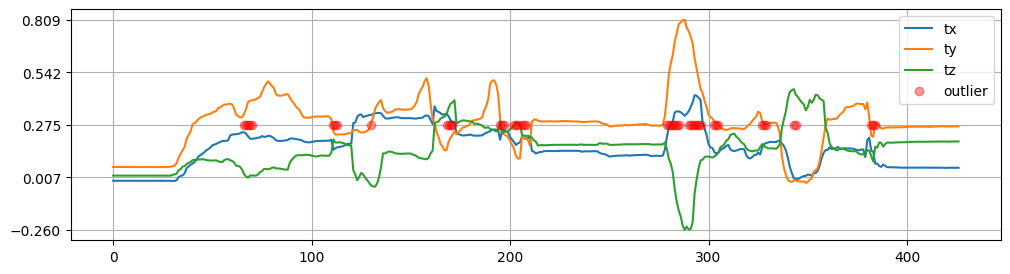

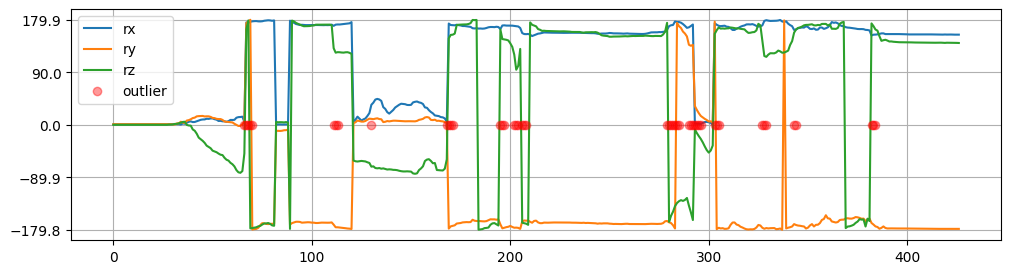

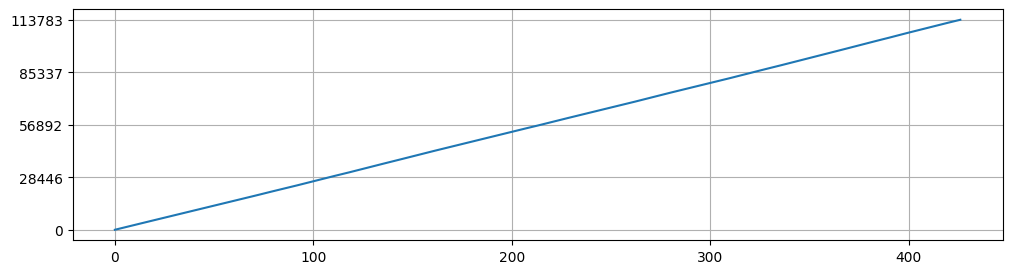

In [ ]:
# Fetch XYZ translations
tx = columns['tx'].astype(float)
ty = columns['ty'].astype(float)
tz = columns['tz'].astype(float)
tmin, tmax = (np.min([tx.min(), ty.min(), tz.min()]), 
              np.max([tx.max(), ty.max(), tz.max()]))

rx = columns['rx'].astype(float)
ry = columns['ry'].astype(float)
rz = columns['rz'].astype(float)
rmin, rmax = (np.min([rx.min(), ry.min(), rz.min()]), 
              np.max([rx.max(), ry.max(), rz.max()]))

# Fetch outliers
outliers = columns['outlier'].astype('uint8')
outliers = np.argwhere(outliers == 1).flatten()

# Fetch time
elapsed = columns['elapsed'].astype(int)

print('Min/max translation:', '[', tmin, '..', tmax, ']')
print('Min/max rotation:', '[', rmin, '..', rmax, ']')
print('Number of outliers:', outliers.size)
lineplot([tx, ty, tz], N_RECORDS, tmin, tmax, markers=outliers, labels=['tx', 'ty', 'tz', 'outlier'])
lineplot([rx, ry, rz], N_RECORDS, rmin, rmax, markers=outliers, labels=['rx', 'ry', 'rz', 'outlier'])
lineplot([elapsed], N_RECORDS, elapsed.min(), elapsed.max())

In [154]:
cloud = o3d.io.read_point_cloud(PCL)
o3d.visualization.draw_geometries([cloud])

[Open3D INFO]   -- Mouse view control --
[Open3D INFO]     Left button + drag         : Rotate.
[Open3D INFO]     Ctrl + left button + drag  : Translate.
[Open3D INFO]     Wheel button + drag        : Translate.
[Open3D INFO]     Shift + left button + drag : Roll.
[Open3D INFO]     Wheel                      : Zoom in/out.
[Open3D INFO] 
[Open3D INFO]   -- Keyboard view control --
[Open3D INFO]     [/]          : Increase/decrease field of view.
[Open3D INFO]     R            : Reset view point.
[Open3D INFO]     Ctrl/Cmd + C : Copy current view status into the clipboard.
[Open3D INFO]     Ctrl/Cmd + V : Paste view status from clipboard.
[Open3D INFO] 
[Open3D INFO]   -- General control --
[Open3D INFO]     Q, Esc       : Exit window.
[Open3D INFO]     H            : Print help message.
[Open3D INFO]     P, PrtScn    : Take a screen capture.
[Open3D INFO]     D            : Take a depth capture.
[Open3D INFO]     O            : Take a capture of current rendering settings.
[Open3D INFO